<a href="https://colab.research.google.com/github/freehtet/Machine-Learning/blob/main/M504_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adding cover page

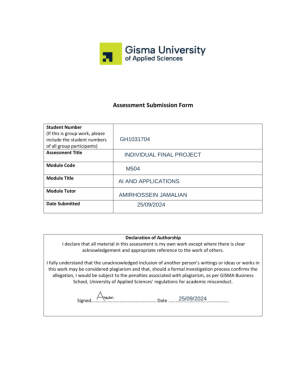

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Assessment Submission Form_all modules.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# **Introduction**: Superstore Sales Data Analysis
Superstore company, a large superstore chain, aims to optimize its operations and increase profitability by gaining insights from its sales data. We have comprehensive transaction records that capture various aspects of our business operations.

------------------------------------------------------------------------------

## **Dataset Overview**
The dataset contains detailed information about each sale, including:

- Transaction details: Row ID, Order ID, Order Date, Ship Date, Ship Mode
- Customer information: Customer ID, Customer Name, Segment
- Geographical data: Country, City, Postal Code, Region
- Product information: Product ID, Category, Sub-Category, Product Name
- Financial metrics: Sales, Quantity, Discount, Profit

Total entries: [9994]

------------------------------------------------------------------------------

# Data Cleaning
Our data cleaning process involved the following steps:

1. **Missing Values**: No missing values were found in the dataset.
2. **Data Types**: All data types were correctly assigned; no corrections were needed.
3. **Duplicates**: No duplicate entries were present in the dataset.
4. **Outlier Detection and Treatment**: Identified and addressed outliers in the data.
5. **Feature Engineering**: Created new features to enhance analysis capabilities.
6. **Normalization and Standardization**: Applied scaling techniques to numerical variables.
7. **Data Validation and Storage**: Verified the cleaned data and saved it securely.

These steps ensured our dataset was properly prepared for analysis.

------------------------------------------------------------------------------

## **Business Questions**
Our analysis focuses on addressing the following key business questions:

1. What are the overall sales and profit trends over time?
2. What is the average delay between the order date, and shipping date? is it getting improved.
3. Which customer segments generate the most profit?
4. Ranking states based on the profit? Most and Least Profitable States
5. Which are the top 10 cities by profit in Top 2 states by profit?
6. Which are the Top 10 Products by profit?
7. Which is the Top Product category based on profitability?
8. Who are our Top 10 Profitable customers?
9. Is there a corelation between sales, quantity, discount, and profit? Relation b/w sales metrics.
10. Heatmap of sales metrics. Discover correlation b/w sales metrics using Heatmaps.

------------------------------------------------------------------------------

## **Analysis Approach**
To answer these questions, we've conducted various analyses, including:

1. Time series analysis of sales and profits
2. Segmentation analysis by customer type and product category
3. Geographical analysis of sales and profits
4. Profitability analysis by product and customer
5. Correlation analysis of key financial metrics
6. Visualization of data trends using various plot types (line plots, bar charts, scatter plots, heatmaps)

------------------------------------------------------------------------------

Through this comprehensive analysis, we aim to identify opportunities for improving our business operations, optimizing our product offerings, and enhancing our customer targeting strategies to drive growth and increase profitability.


[Data Source](https://www.kaggle.com/datasets/jacopoferretti/superstore-dataset/data)

## - Importing Libraries & Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import Dataset

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')

## **Exploration**:
Using the following functions to get an overview of the dataset.    
- df.head()
- df.info()     
- print(df.isnull().sum())


#Display the first few rows of the DataFrame.


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Provides a summary of dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Return the number of missing values in each column.

In [ ]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64



------------------------------------------------------------------------------



## **Questions starts from Here --->**



# **1. What are the overall sales and profit trends over time?**

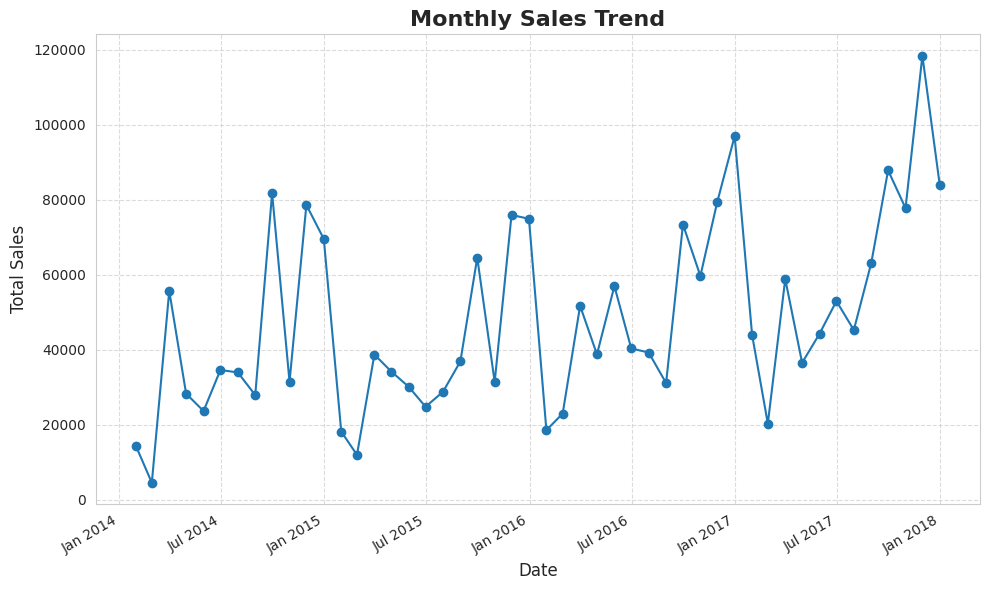

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def preprocess_data(df):
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    return df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

def create_sales_plot(df_monthly):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-', color='#1f77b4')

    ax.set_title('Monthly Sales Trend', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Total Sales', fontsize=12)

    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

    date_formatter = DateFormatter("%b %Y")
    ax.xaxis.set_major_formatter(date_formatter)
    fig.autofmt_xdate()

    plt.tight_layout()
    return fig

# Main execution
def main(df):
    try:
        df_monthly = preprocess_data(df)
        fig = create_sales_plot(df_monthly)
        plt.show()
    except KeyError as e:
        print(f"Error: The DataFrame is missing a required column. {e}")
    except ValueError as e:
        print(f"Error: There was a problem with data processing. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Assuming 'df' is your DataFrame
if 'df' in globals():
    main(df)
else:
    print("Error: 'df' DataFrame not found. Please ensure your data is loaded correctly.")

## **Description:**
   - Importance: Helps track the company's growth and financial health over time.
   - Results: Sales have been growing year over year for the last 4 years, indicating positive business growth.




------------------------------------------------------------------------------


# **2. What is the average delay between the order date, and shipping date? is it getting improved.**

Average Shipping Delay by Year:
 Year    Delay
 2014 3.996989
 2015 4.013796
 2016 3.950522
 2017 3.905495


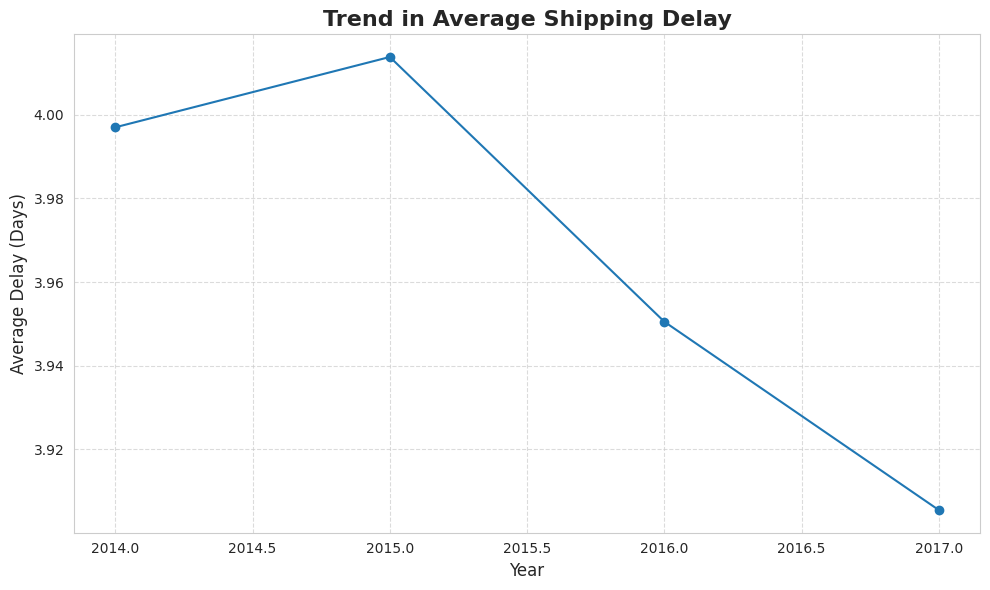

In [ ]:
def process_dates(dataframe):
    for col in ['Order Date', 'Ship Date']:
        dataframe[col] = pd.to_datetime(dataframe[col])
    return dataframe

def compute_delay(dataframe):
    dataframe['Delay'] = (dataframe['Ship Date'] - dataframe['Order Date']).dt.days
    dataframe['Year'] = dataframe['Order Date'].dt.year
    return dataframe

def aggregate_delay_by_year(dataframe):
    return dataframe.groupby('Year')['Delay'].mean().reset_index()

def print_delay_summary(delay_data):
    print("Average Shipping Delay by Year:")
    print(delay_data.to_string(index=False))

def visualize_delay_trend(delay_data):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(delay_data['Year'], delay_data['Delay'], marker='o', linestyle='-', color='#1f77b4')
    ax.set_title('Trend in Average Shipping Delay', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Average Delay (Days)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()

# Main execution
df = process_dates(df)
df = compute_delay(df)
yearly_delay_avg = aggregate_delay_by_year(df)

print_delay_summary(yearly_delay_avg)
visualize_delay_trend(yearly_delay_avg)

## **Description:**
   - Importance: Measures operational efficiency and customer satisfaction.
   - Results: The time between order and shipment has decreased by 0.1 days over the last 4 years, showing improved efficiency.



------------------------------------------------------------------------------


## **3. Which customer segments generate the most profit?**

Profit by Customer Segment:
    Segment      Profit
   Consumer 134119.2092
  Corporate  91979.1340
Home Office  60298.6785


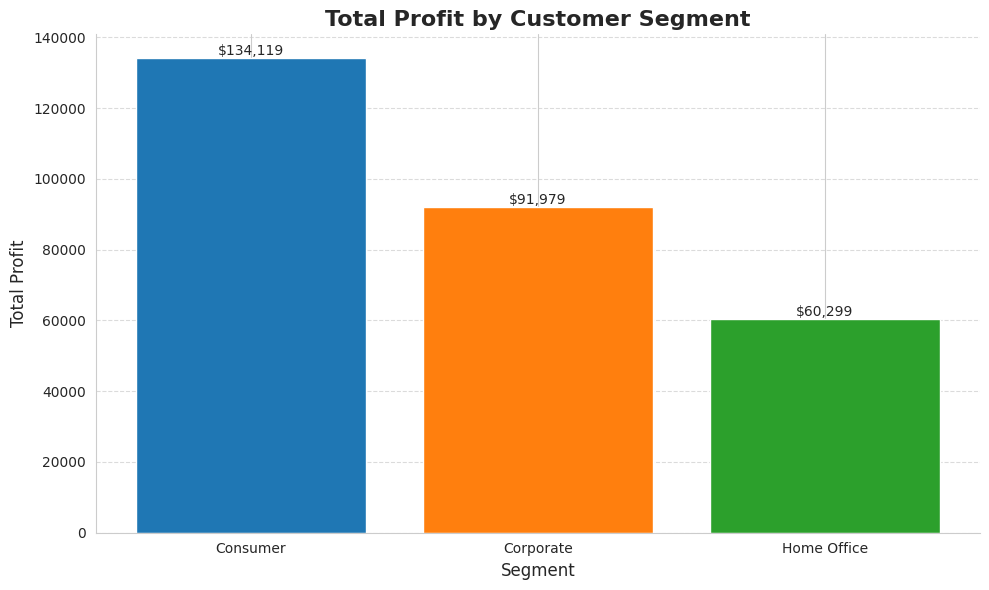


The most profitable segment is Consumer with $134,119.21 in total profit.


In [ ]:
def analyze_profit_by_segment(df):
    return df.groupby('Segment')['Profit'].sum().reset_index()

def display_profit_table(profit_data):
    print("Profit by Customer Segment:")
    print(profit_data.to_string(index=False))

def plot_profit_by_segment(profit_data):
    fig, ax = plt.subplots(figsize=(10, 6))

    segments = profit_data['Segment']
    profits = profit_data['Profit']

    bars = ax.bar(segments, profits, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

    ax.set_title('Total Profit by Customer Segment', fontsize=16, fontweight='bold')
    ax.set_xlabel('Segment', fontsize=12)
    ax.set_ylabel('Total Profit', fontsize=12)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=10)

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    return fig

def main(df):
    try:
        profit_by_segment = analyze_profit_by_segment(df)
        display_profit_table(profit_by_segment)
        fig = plot_profit_by_segment(profit_by_segment)
        plt.show()

        # Determine the most profitable segment
        most_profitable = profit_by_segment.loc[profit_by_segment['Profit'].idxmax()]
        print(f"\nThe most profitable segment is {most_profitable['Segment']} "
              f"with ${most_profitable['Profit']:,.2f} in total profit.")

    except KeyError as e:
        print(f"Error: The DataFrame is missing a required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Check if DataFrame exists and run analysis
if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid. Please ensure your data is loaded correctly.")

## **Description:**
   - Importance: Identifies the most valuable customer groups for targeted marketing and service improvements.
   - Results: The most profitable segments is: Consumers.



------------------------------------------------------------------------------



# **4. Ranking states based on the profit? Most and Least Profitable States**

Top 10 States by Profit:
     State     Profit
California 76381.3871
  New York 74038.5486
Washington 33402.6517
  Michigan 24463.1876
  Virginia 18597.9504
   Indiana 18382.9363
   Georgia 16250.0433
  Kentucky 11199.6966
 Minnesota 10823.1874
  Delaware  9977.3748


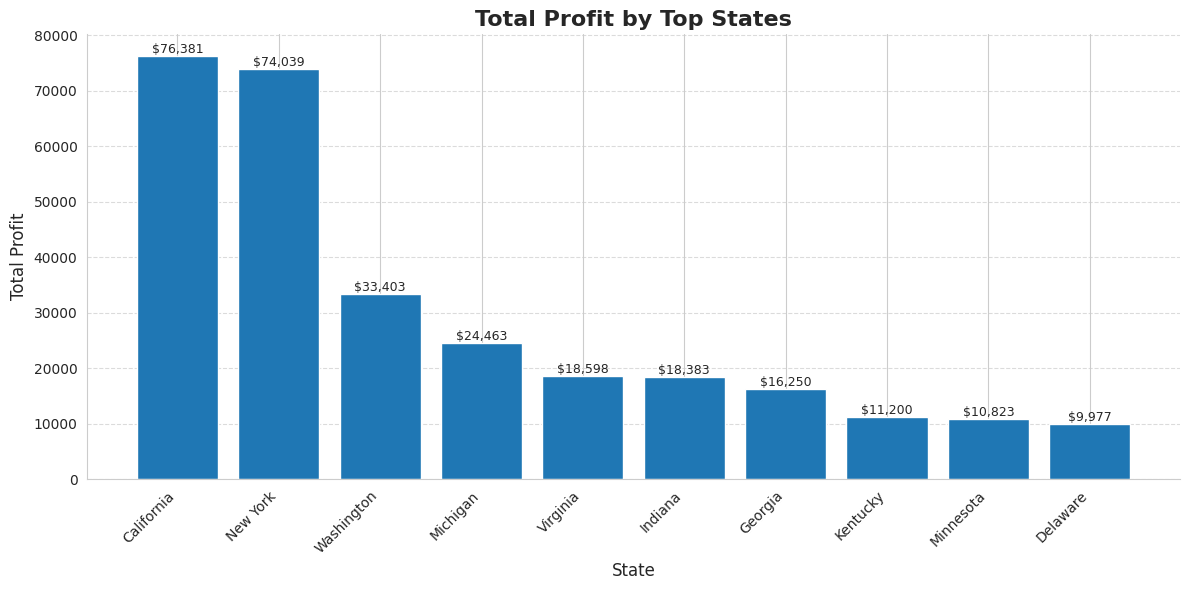


Most profitable state: California ($76,381.39)
Least profitable state: Texas ($-25,729.36)


In [ ]:
def analyze_profit_by_state(df):
    profit_by_state = df.groupby('State')['Profit'].sum().reset_index()
    return profit_by_state.sort_values(by='Profit', ascending=False)

def display_profit_table(profit_data, top_n=10):
    print(f"Top {top_n} States by Profit:")
    print(profit_data.head(top_n).to_string(index=False))

def plot_profit_by_state(profit_data, top_n=10):
    top_states = profit_data.head(top_n)

    fig, ax = plt.subplots(figsize=(12, 6))

    bars = ax.bar(top_states['State'], top_states['Profit'], color='#1f77b4')

    ax.set_title('Total Profit by Top States', fontsize=16, fontweight='bold')
    ax.set_xlabel('State', fontsize=12)
    ax.set_ylabel('Total Profit', fontsize=12)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0, fontsize=9)

    plt.xticks(rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    return fig

def main(df):
    try:
        profit_by_state = analyze_profit_by_state(df)
        display_profit_table(profit_by_state)
        fig = plot_profit_by_state(profit_by_state)
        plt.show()

        # Identify the most and least profitable states
        most_profitable = profit_by_state.iloc[0]
        least_profitable = profit_by_state.iloc[-1]

        print(f"\nMost profitable state: {most_profitable['State']} "
              f"(${most_profitable['Profit']:,.2f})")
        print(f"Least profitable state: {least_profitable['State']} "
              f"(${least_profitable['Profit']:,.2f})")

    except KeyError as e:
        print(f"Error: The DataFrame is missing a required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Check if DataFrame exists and run analysis
if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid. Please ensure your data is loaded correctly.")

## **Description:**
   - Importance: Provides a more granular view of geographical performance within key states.
   - Results: New York City and Los Angeles are the most profitable cities.




------------------------------------------------------------------------------


# **5. Which are the top 10 cities by profit in Top 2 states by profit?**

Top 10 Cities by Profit:
         City      State     Profit
New York City   New York 62036.9837
  Los Angeles California 30440.7579
San Francisco California 17507.3854
    San Diego California  6377.1960
      Yonkers   New York  2767.7557
   Sacramento California  2069.6859
   Long Beach   New York  1362.5350
    Jamestown   New York  1285.7715
      Anaheim California  1234.0036
    Rochester   New York  1223.2151


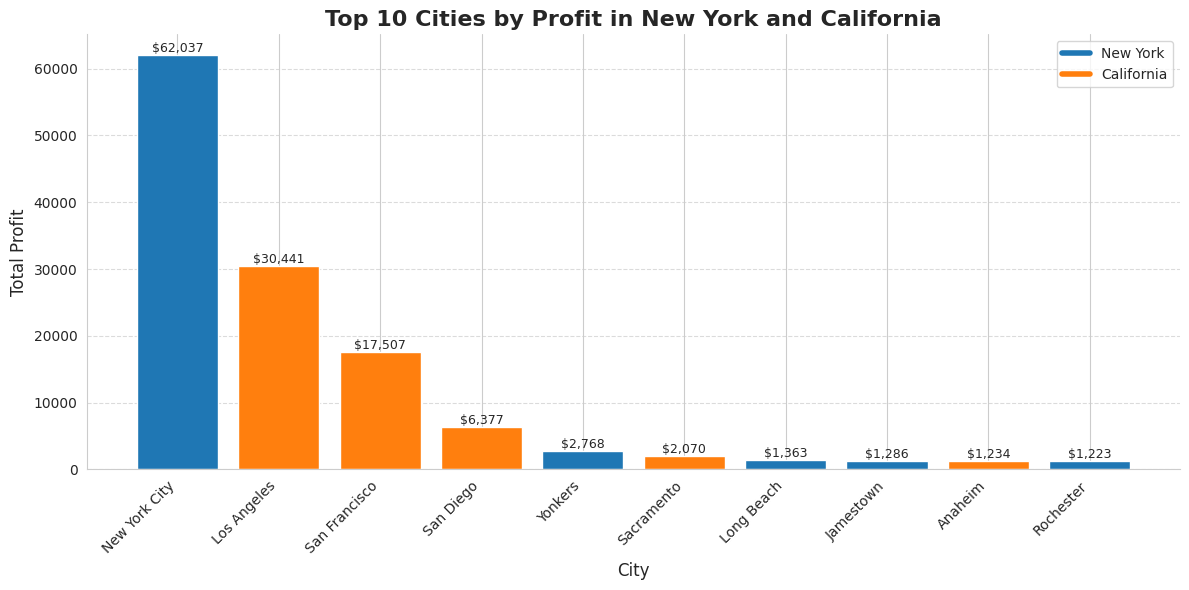


Top city in California: Los Angeles ($30,440.76)

Top city in New York: New York City ($62,036.98)


In [ ]:
def filter_top_states(df, states):
    return df[df['State'].isin(states)]

def analyze_profit_by_city(df):
    return df.groupby(['City', 'State'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

def plot_top_cities_profit(profit_data, top_n=10):
    top_cities = profit_data.head(top_n)

    fig, ax = plt.subplots(figsize=(12, 6))

    colors = ['#1f77b4' if state == profit_data['State'].iloc[0] else '#ff7f0e' for state in top_cities['State']]
    bars = ax.bar(top_cities['City'], top_cities['Profit'], color=colors)

    ax.set_title(f'Top {top_n} Cities by Profit in {" and ".join(top_cities["State"].unique())}', fontsize=16, fontweight='bold')
    ax.set_xlabel('City', fontsize=12)
    ax.set_ylabel('Total Profit', fontsize=12)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0, fontsize=9)

    plt.xticks(rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create custom legend
    legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=state)
                       for color, state in zip(['#1f77b4', '#ff7f0e'], top_cities['State'].unique())]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    return fig

def display_top_cities(profit_data, top_n=10):
    print(f"Top {top_n} Cities by Profit:")
    print(profit_data.head(top_n).to_string(index=False))

def main(df):
    try:
        top_states = df.groupby('State')['Profit'].sum().nlargest(2).index.tolist()
        df_filtered = filter_top_states(df, top_states)
        profit_by_city = analyze_profit_by_city(df_filtered)

        display_top_cities(profit_by_city)

        fig = plot_top_cities_profit(profit_by_city)
        plt.show()

        # Additional insights
        for state in top_states:
            top_city = profit_by_city[profit_by_city['State'] == state].iloc[0]
            print(f"\nTop city in {state}: {top_city['City']} (${top_city['Profit']:,.2f})")

    except KeyError as e:
        print(f"Error: The DataFrame is missing a required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Check if DataFrame exists and run analysis
if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid. Please ensure your data is loaded correctly.")

## **Description:**
Importance: Provides a more granular view of geographical performance within key states.
Results: New York City and Los Angeles are the most profitable cities.


------------------------------------------------------------------------------


# **6. Which are the Top 10 Products by profit?**

Top 10 Products by Profit:
                                                               Product Name     Profit
                                      Canon imageCLASS 2200 Advanced Copier 25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  7753.0390
                                       Hewlett Packard LaserJet 3310 Copier  6983.8836
                                         Canon PC1060 Personal Laser Copier  4570.9347
                  HP Designjet T520 Inkjet Large Format Printer - 24" Color  4094.9766
                                          Ativa V4110MDD Micro-Cut Shredder  3772.9461
                           3D Systems Cube Printer, 2nd Generation, Magenta  3717.9714
                 Plantronics Savi W720 Multi-Device Wireless Headset System  3696.2820
                                       Ibico EPK-21 Electric Binding System  3345.2823
                                          Zebra ZM400 Thermal Label Printer  3343.5360


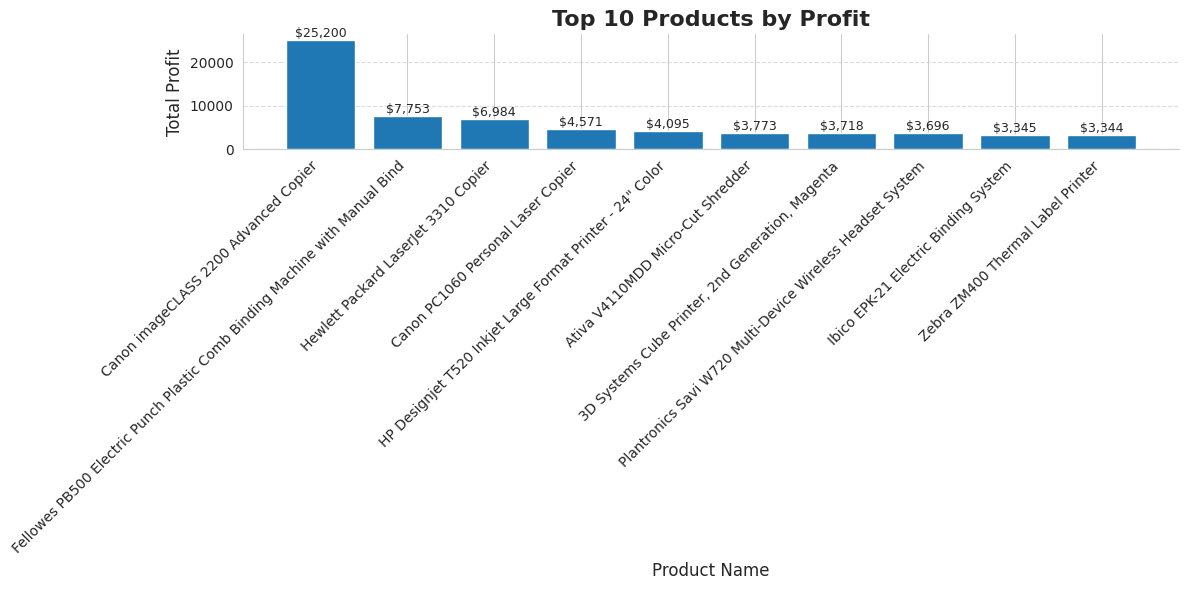


Most profitable product: Canon imageCLASS 2200 Advanced Copier ($25,199.93)
Least profitable product: Cubify CubeX 3D Printer Double Head Print ($-8,879.97)


In [ ]:
def analyze_profit_by_product(df):
    profit_by_product = df.groupby('Product Name')['Profit'].sum().reset_index()
    return profit_by_product.sort_values(by='Profit', ascending=False)

def display_top_products(profit_data, top_n=10):
    print(f"Top {top_n} Products by Profit:")
    print(profit_data.head(top_n).to_string(index=False))

def plot_top_products_profit(profit_data, top_n=10):
    top_products = profit_data.head(top_n)

    fig, ax = plt.subplots(figsize=(12, 6))

    bars = ax.bar(top_products['Product Name'], top_products['Profit'], color='#1f77b4')

    ax.set_title(f'Top {top_n} Products by Profit', fontsize=16, fontweight='bold')
    ax.set_xlabel('Product Name', fontsize=12)
    ax.set_ylabel('Total Profit', fontsize=12)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0, fontsize=9)

    plt.xticks(rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    return fig

def main(df):
    try:
        profit_by_product = analyze_profit_by_product(df)

        display_top_products(profit_by_product)

        fig = plot_top_products_profit(profit_by_product)
        plt.show()

        # Additional insights
        top_product = profit_by_product.iloc[0]
        bottom_product = profit_by_product.iloc[-1]
        print(f"\nMost profitable product: {top_product['Product Name']} (${top_product['Profit']:,.2f})")
        print(f"Least profitable product: {bottom_product['Product Name']} (${bottom_product['Profit']:,.2f})")

    except KeyError as e:
        print(f"Error: The DataFrame is missing a required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Check if DataFrame exists and run analysis
if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid. Please ensure your data is loaded correctly.")

## **Description:**
   - Importance: Identifies the most successful products for potential scaling or replication of success.
   - Results: Specific top products were identified (details not provided in the summary).



------------------------------------------------------------------------------


# **7. Which is the Top Product category based on profitability?**

Profit by Sub-Category:
Sub-Category      Profit
     Copiers  55617.8249
      Phones  44515.7306
 Accessories  41936.6357
       Paper  34053.5693
     Binders  30221.7633
      Chairs  26590.1663
     Storage  21278.8264
  Appliances  18138.0054
 Furnishings  13059.1436
   Envelopes   6964.1767
         Art   6527.7870
      Labels   5546.2540
    Machines   3384.7569
   Fasteners    949.5182
    Supplies  -1189.0995
   Bookcases  -3472.5560
      Tables -17725.4811


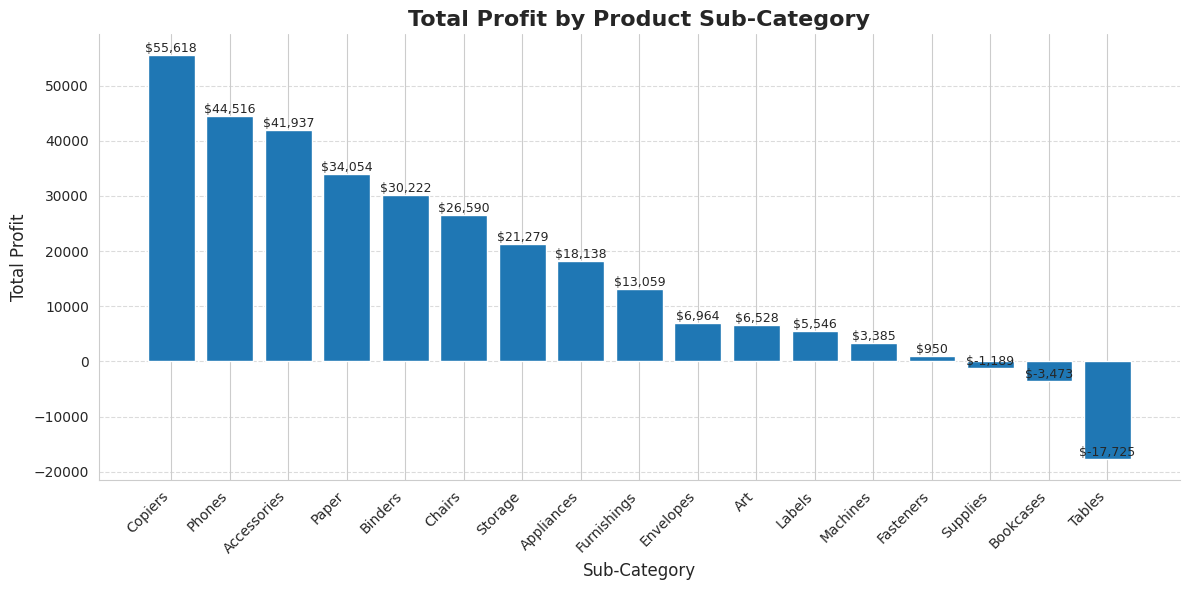


Most profitable sub-category: Copiers ($55,617.82)
Least profitable sub-category: Tables ($-17,725.48)


In [ ]:
def analyze_profit_by_subcategory(df):
    profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
    return profit_by_subcategory.sort_values(by='Profit', ascending=False)

def display_subcategory_profits(profit_data):
    print("Profit by Sub-Category:")
    print(profit_data.to_string(index=False))

def plot_subcategory_profits(profit_data):
    fig, ax = plt.subplots(figsize=(12, 6))

    bars = ax.bar(profit_data['Sub-Category'], profit_data['Profit'], color='#1f77b4')

    ax.set_title('Total Profit by Product Sub-Category', fontsize=16, fontweight='bold')
    ax.set_xlabel('Sub-Category', fontsize=12)
    ax.set_ylabel('Total Profit', fontsize=12)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0, fontsize=9)

    plt.xticks(rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    return fig

def main(df):
    try:
        profit_by_subcategory = analyze_profit_by_subcategory(df)
        display_subcategory_profits(profit_by_subcategory)
        fig = plot_subcategory_profits(profit_by_subcategory)
        plt.show()

        top_subcategory = profit_by_subcategory.iloc[0]
        bottom_subcategory = profit_by_subcategory.iloc[-1]
        print(f"\nMost profitable sub-category: {top_subcategory['Sub-Category']} (${top_subcategory['Profit']:,.2f})")
        print(f"Least profitable sub-category: {bottom_subcategory['Sub-Category']} (${bottom_subcategory['Profit']:,.2f})")

    except KeyError as e:
        print(f"Error: Missing required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid.")


## **Description:**
   - Importance: Guides inventory and marketing decisions at a broader level.
   - Results: Copiers and binders are the most profitable categories of products.



------------------------------------------------------------------------------


# **8. Who are our Top 10 Profitable customers?**

Top 10 Most Profitable Customers:
Customer ID        Customer Name    Profit
   TC-20980         Tamara Chand 8981.3239
   RB-19360         Raymond Buch 6976.0959
   SC-20095         Sanjit Chand 5757.4119
   HL-15040         Hunter Lopez 5622.4292
   AB-10105        Adrian Barton 5444.8055
   TA-21385         Tom Ashbrook 4703.7883
   CM-12385 Christopher Martinez 3899.8904
   KD-16495        Keith Dawkins 3038.6254
   AR-10540          Andy Reiter 2884.6208
   DR-12940        Daniel Raglin 2869.0760


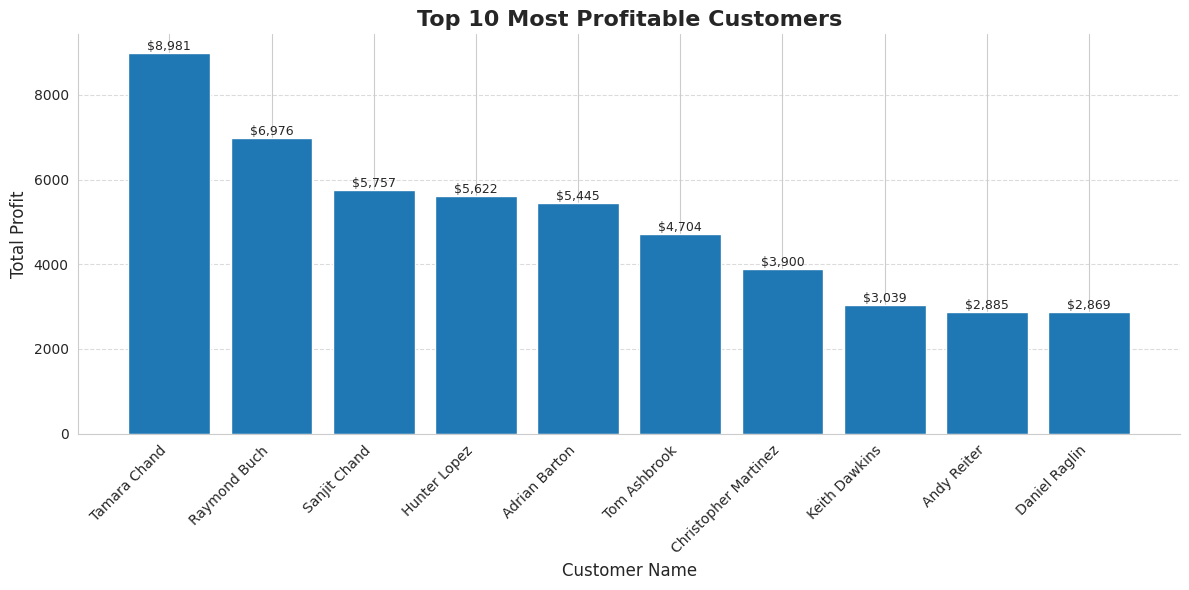


Most profitable customer: Tamara Chand (ID: TC-20980) - $8,981.32


In [ ]:
def analyze_profit_by_customer(df):
    profit_by_customer = df.groupby(['Customer ID', 'Customer Name'])['Profit'].sum().reset_index()
    return profit_by_customer.sort_values(by='Profit', ascending=False)

def display_top_customers(profit_data, top_n=10):
    print(f"Top {top_n} Most Profitable Customers:")
    print(profit_data.head(top_n).to_string(index=False))

def plot_top_customers(profit_data, top_n=10):
    top_customers = profit_data.head(top_n)

    fig, ax = plt.subplots(figsize=(12, 6))

    bars = ax.bar(top_customers['Customer Name'], top_customers['Profit'], color='#1f77b4')

    ax.set_title(f'Top {top_n} Most Profitable Customers', fontsize=16, fontweight='bold')
    ax.set_xlabel('Customer Name', fontsize=12)
    ax.set_ylabel('Total Profit', fontsize=12)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0, fontsize=9)

    plt.xticks(rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    return fig

def main(df):
    try:
        profit_by_customer = analyze_profit_by_customer(df)
        display_top_customers(profit_by_customer)
        fig = plot_top_customers(profit_by_customer)
        plt.show()

        top_customer = profit_by_customer.iloc[0]
        print(f"\nMost profitable customer: {top_customer['Customer Name']} (ID: {top_customer['Customer ID']}) - ${top_customer['Profit']:,.2f}")

    except KeyError as e:
        print(f"Error: Missing required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid.")


## **Description:**
   - Importance: Identifies key accounts for relationship management and potential upselling.
   - Results: Tamara Chand and Raymond Buch are among the most profitable clients.



------------------------------------------------------------------------------


# **Correlation Analysis:**

# **Relationship between Sales Metrics**

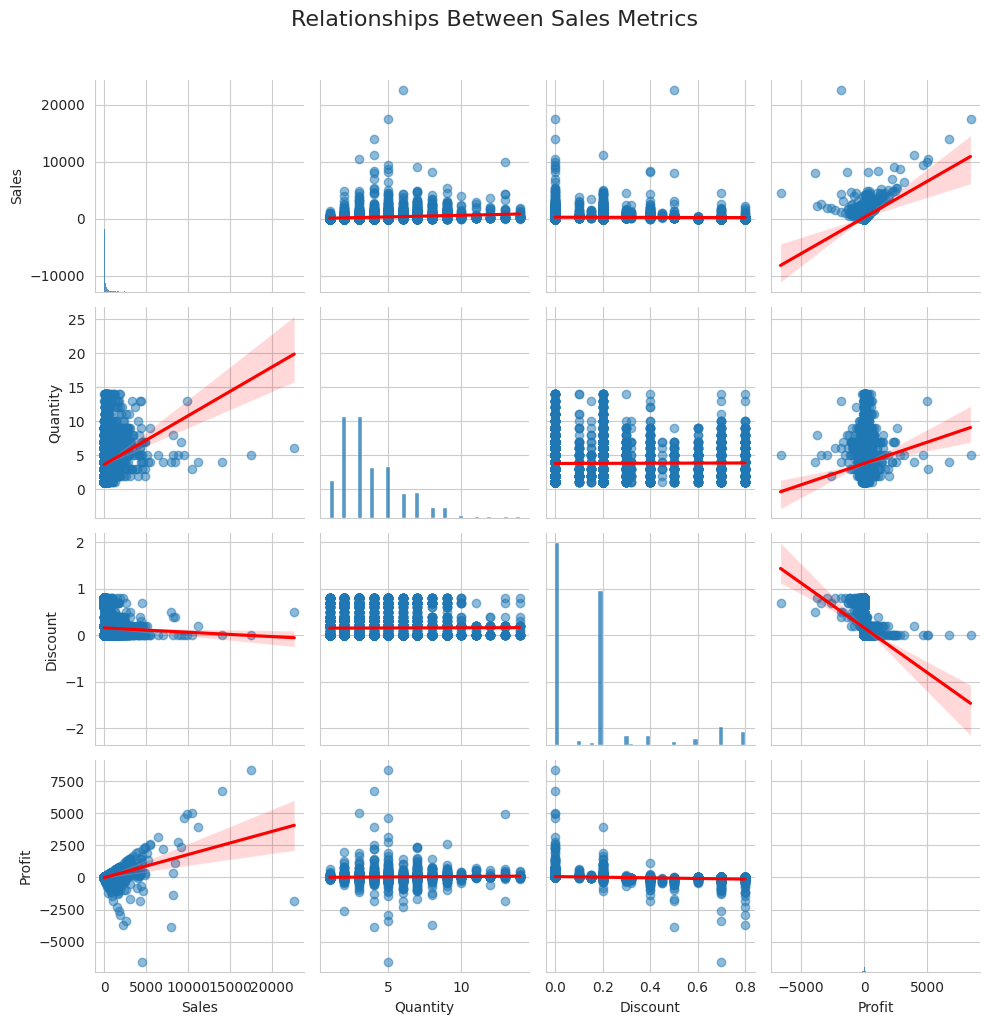

Pairplot analysis:
Correlation between Sales and Quantity: 0.20
Correlation between Sales and Discount: -0.03
Correlation between Sales and Profit: 0.48
Correlation between Quantity and Discount: 0.01
Correlation between Quantity and Profit: 0.07
Correlation between Discount and Profit: -0.22


In [ ]:
def create_pairplot(df, columns, height=2.5):
    sns.set_style("whitegrid")
    fig = sns.pairplot(df[columns], height=height, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

    fig.fig.suptitle('Relationships Between Sales Metrics', fontsize=16, y=1.02)

    for ax in fig.axes.flatten():
        ax.set_xlabel(ax.get_xlabel(), fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)

    return fig

def main(df):
    try:
        cols = ['Sales', 'Quantity', 'Discount', 'Profit']
        fig = create_pairplot(df, cols)
        plt.tight_layout()
        plt.show()

        print("Pairplot analysis:")
        for i, col1 in enumerate(cols):
            for col2 in cols[i+1:]:
                correlation = df[col1].corr(df[col2])
                print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

    except KeyError as e:
        print(f"Error: Missing required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid.")


## **Description:**
   - Importance: Reveals relationships between key sales metrics to inform pricing and sales strategies.
   - Results: Profit increases with sales and quantity, but decreases with higher discounts.



------------------------------------------------------------------------------


# Heatmap of Sales Metrics:

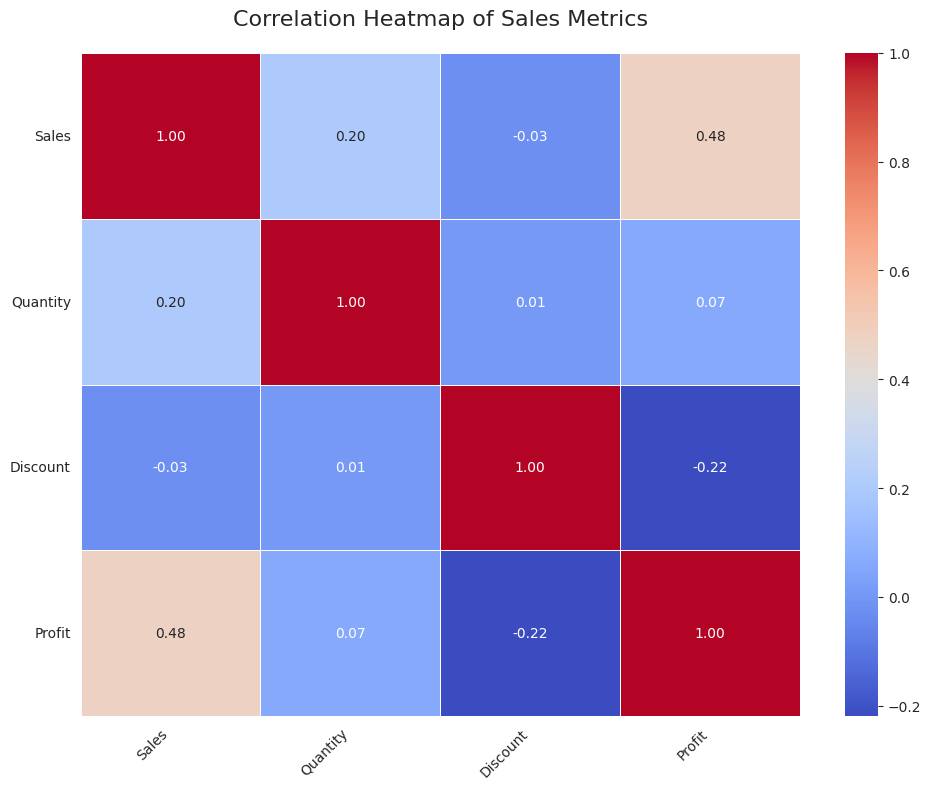


Correlation Interpretation:
Sales and Quantity: weak positive correlation (0.20)
Sales and Discount: weak negative correlation (-0.03)
Sales and Profit: moderate positive correlation (0.48)
Quantity and Discount: weak positive correlation (0.01)
Quantity and Profit: weak positive correlation (0.07)
Discount and Profit: weak negative correlation (-0.22)


In [ ]:
def create_correlation_matrix(df, columns):
    return df[columns].corr()

def plot_correlation_heatmap(corr_matrix):
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(corr_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=0.5,
                ax=ax)

    ax.set_title('Correlation Heatmap of Sales Metrics', fontsize=16, pad=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    return fig

def interpret_correlations(corr_matrix):
    for i, col1 in enumerate(corr_matrix.columns):
        for j, col2 in enumerate(corr_matrix.columns):
            if i < j:  # to avoid repetition
                corr = corr_matrix.iloc[i, j]
                strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.4 else "weak"
                direction = "positive" if corr > 0 else "negative"
                print(f"{col1} and {col2}: {strength} {direction} correlation ({corr:.2f})")

def main(df):
    try:
        cols = ['Sales', 'Quantity', 'Discount', 'Profit']
        corr_matrix = create_correlation_matrix(df, cols)

        fig = plot_correlation_heatmap(corr_matrix)
        plt.tight_layout()
        plt.show()

        print("\nCorrelation Interpretation:")
        interpret_correlations(corr_matrix)

    except KeyError as e:
        print(f"Error: Missing required column. {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if 'df' in globals() and isinstance(df, pd.DataFrame):
    main(df)
else:
    print("Error: 'df' DataFrame not found or invalid.")

## **Description:**
Importance: Provides a visual representation of correlations to quickly identify patterns.
Results: Confirmed the relationships observed in the correlation analysis, providing a clear visual of these connections.

--------------------------------------------------------------------------------------------------------

# **Conclusion: Superstore Sales Data Analysis**

The comprehensive analysis of the Superstore sales data has revealed several key insights and areas for potential improvement:

## **Key Findings**

1. **Growth Trend**: Sales have shown consistent year-over-year growth for the past four years, indicating a **positive trajectory** for the business.

2. **Operational Efficiency**: The average time between order placement and shipment has decreased by **0.1 days** over the last four years, suggesting improvements in our logistics and fulfillment processes.

3. **Customer Segmentation**: Our most profitable **customer segments**, in order, are Consumers, Corporate clients, and Home Office users among them **Consumer **are most profitable. This highlights the importance of our B2C operations while also indicating strong B2B potential.

4. **Geographical Performance**: **California and New York** stand out as our most profitable states, with **New York City and Los Angeles** being the top-performing cities. This suggests a strong presence in major urban markets.

5. Our most profitable product is Canon imageCLASS 2200 Advanced Copier ($25,199.93)

6. **Product Performance**: **Copiers and binders** are our most profitable product categories, indicating potential areas for further investment and marketing focus.

7. **Key Clients**: **Tamara Chand and Raymond Buch **have been identified as our most profitable clients, underscoring the value of nurturing and retaining high-value customers.

8. **Sales and Profit Correlations**:
   - Profit shows a positive correlation with both sales volume and quantity sold.
   - However, there's a **negative correlation **between **profit and discounts**, suggesting careful management of promotional strategies is necessary.

## Areas for Further Investigation

1. **Profit Trends**: While sales have grown, we need to analyze if profits have followed a similar trend over the past four years.

2. **Shipping Optimization**: Investigate the factors behind decreased shipping times and explore strategies to further reduce these times.

3. **Customer Strategy**: Develop targeted strategies to better serve and expand our consumer and corporate customer bases.

4. **Geographical Expansion**: Analyze the factors contributing to success in our top-performing states and cities, and develop strategies to replicate this success in underperforming regions.

5. **Product Focus**: Investigate why binders and copiers are our top categories and explore ways to enhance our offerings in these areas.

6. **Client Relationships**: Develop a strategy to strengthen relationships with our most profitable clients and identify potential high-value clients for targeted engagement.

7. **Product Profitability**: Conduct a thorough review of unprofitable products and develop action plans for each (e.g., discontinuation, repricing, or marketing adjustments).

By addressing these areas, we can build on our strengths, address weaknesses, and position the Superstore for continued growth and increased profitability. The next steps should involve deeper dives into each of these areas, developing specific action plans, and setting measurable goals for improvement.